
# Project: TMDb Movie Data Set Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: For my project, I would be analyzing the Movie Data Set. The data set contains a number of features such as the id,popularity, budget, genre etc.
I would be performing an Exploratory Data Analysis and try to answer questions such as:-
<ul>
<li>What is the average rating of each genre?</li>
<li>Which production company has earned most money?/</li>
<li>Comparison of the 10 most successful and 10 least successful films (successful in terms of revenue)</li>
<li>What factors lead to a better average vote</li>    
<li>Do more popular films recieve a higher rating?</li>        
</ul> 

In [1]:
# Use this cell to set up import statements for all of the packages that you
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling and Data Cleaning

I will be combining both the steps since it would be easier for me to see the problem and then solve it then and there


In [2]:
df=pd.read_csv('tmdb-movies.csv') #importing the dataset

In [3]:
df.head(2) 

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [4]:
df.shape

(10866, 21)

In [5]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

<b>Most of the features have a correct data type except for the release_date column. The current data type is object which is infact a string. Although, it won't be much of a problem to work with strings, it is easier to work with date/datetime formats. Hence, I would be converting the data type of the "release_date" column. But that would be for later. Now, let's begin with removing the null values </b>

## Removing Null Values

In [6]:
df.describe() #Summary Statistics

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [7]:
df.info() #Nulls and Other Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

<b>Above, I can see a list of all the columns, their non-null count and their data type.
Seems like that the columns "tagline", "homepage" have a large number of null values. It would be good to drop these columns here itself since firstly, they have a large number of null values and secondly, they do not contribute to the data analysis. The questions which I need to answer can be answered without these columns in place.</b>

In [8]:
df.drop(['homepage','tagline','keywords','overview'], axis=1, inplace=True) #dropping columns homepage and tagline

In [9]:
df.info() #Checking to see if the dropped have certainly been dropped 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   director              10822 non-null  object 
 8   runtime               10866 non-null  int64  
 9   genres                10843 non-null  object 
 10  production_companies  9836 non-null   object 
 11  release_date          10866 non-null  object 
 12  vote_count            10866 non-null  int64  
 13  vote_average          10866 non-null  float64
 14  release_year          10866 non-null  int64  
 15  budget_adj         

In [10]:
df.isnull().sum() #Null values in each columns

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

<b>The null values in each row can be seen above. Hence, I will now be deleting rows which contain null values</b>

In [11]:
df.dropna(inplace=True) #Dropping the rows with null values

In [12]:
df.isnull().sum() #Checking again to see if the null values have certainly been removed

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

<b>Deleting rows which have 0 budget, 0 revenue and 0 runtime since they are logically incorrect</b>

In [13]:
# creating a seperate list of revenue , runtime and budget column
cols_del=['budget', 'revenue','runtime']

#this will replace all the value from '0' to NAN in the list
df[cols_del] = df[cols_del].replace(0, np.NAN)

#Removing all the row which has NaN value in temp_list 
df.dropna(subset = cols_del, inplace = True)

<b>Good to go! Our data is now perfect in regards to having only suitable columns and containing no null values. Let's move to checking duplicates now</b>

## Removing Duplicates

In [14]:
df.nunique() #Checking the number of unique values in each column

id                      3805
imdb_id                 3805
popularity              3803
budget                   399
revenue                 3710
original_title          3760
cast                    3784
director                1683
runtime                  136
genres                  1043
production_companies    3005
release_date            2857
vote_count              1274
vote_average              53
release_year              56
budget_adj              2076
revenue_adj             3800
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3806 entries, 0 to 10848
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3806 non-null   int64  
 1   imdb_id               3806 non-null   object 
 2   popularity            3806 non-null   float64
 3   budget                3806 non-null   float64
 4   revenue               3806 non-null   float64
 5   original_title        3806 non-null   object 
 6   cast                  3806 non-null   object 
 7   director              3806 non-null   object 
 8   runtime               3806 non-null   float64
 9   genres                3806 non-null   object 
 10  production_companies  3806 non-null   object 
 11  release_date          3806 non-null   object 
 12  vote_count            3806 non-null   int64  
 13  vote_average          3806 non-null   float64
 14  release_year          3806 non-null   int64  
 15  budget_adj          

<b> Since, id and imdb_id would be unique for each entry, I'm guessing there is atleast one duplicate row in our dataset. Let's check for it</b>

In [16]:
sum(df.duplicated()) #Checking the number of duplicates

1

<b>Yes, there is indeed one duplicate row. Now, I'll be removing the same using drop_duplicates()</b>

In [17]:
df.drop_duplicates(inplace=True)#removing duplicates
sum(df.duplicated()) #checking again for duplicates


0

<b>Duplicates have been removed and on checking for duplicates, we can now see there are no duplicates.</b>

## Checking for Outliers

In [18]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3805.000000,3805.000000,3.805000e+03,3.805000e+03,3805.000000,3805.000000,3805.000000,3805.000000,3.805000e+03,3.805000e+03
mean,40040.372668,1.203784,3.760800e+07,1.089734e+08,109.351117,534.159001,6.170565,2001.229172,4.471977e+07,1.387159e+08
std,67585.708616,1.480569,4.232179e+07,1.772976e+08,19.845678,883.757588,0.792437,11.329616,4.488697e+07,2.169973e+08
min,5.000000,0.010335,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,5925.000000,0.470651,1.000000e+07,1.433379e+07,96.000000,74.000000,5.700000,1995.000000,1.354637e+07,1.925371e+07
50%,11253.000000,0.810805,2.500000e+07,4.621664e+07,106.000000,209.000000,6.200000,2004.000000,3.038360e+07,6.284688e+07
75%,38579.000000,1.387163,5.000000e+07,1.260695e+08,119.000000,584.000000,6.700000,2010.000000,6.084153e+07,1.658054e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


<b>The summary statistics show that the columns Popularity, Vote Count, runtime have outliers. I will now be removing these outliers</b>

In [19]:
df_rows_with_outliers_pop=df.query('popularity>1.626627') #Taking rows with outliers in popularity to a seperate dataframe

In [20]:
df.drop(df_rows_with_outliers_pop.index, axis=0, inplace=True) #dropping rows with outliers

In [21]:
df[df['runtime']>200].info() #Only 53 rows with runtime>200. I will be deleting these rows

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 2107 to 10443
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    7 non-null      int64  
 1   imdb_id               7 non-null      object 
 2   popularity            7 non-null      float64
 3   budget                7 non-null      float64
 4   revenue               7 non-null      float64
 5   original_title        7 non-null      object 
 6   cast                  7 non-null      object 
 7   director              7 non-null      object 
 8   runtime               7 non-null      float64
 9   genres                7 non-null      object 
 10  production_companies  7 non-null      object 
 11  release_date          7 non-null      object 
 12  vote_count            7 non-null      int64  
 13  vote_average          7 non-null      float64
 14  release_year          7 non-null      int64  
 15  budget_adj          

In [22]:
df[df['vote_count']>1500].info() #Only 370 entries with Vote count >1500. I will be deleting these rows

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 1487 to 9335
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    33 non-null     int64  
 1   imdb_id               33 non-null     object 
 2   popularity            33 non-null     float64
 3   budget                33 non-null     float64
 4   revenue               33 non-null     float64
 5   original_title        33 non-null     object 
 6   cast                  33 non-null     object 
 7   director              33 non-null     object 
 8   runtime               33 non-null     float64
 9   genres                33 non-null     object 
 10  production_companies  33 non-null     object 
 11  release_date          33 non-null     object 
 12  vote_count            33 non-null     int64  
 13  vote_average          33 non-null     float64
 14  release_year          33 non-null     int64  
 15  budget_adj          

In [23]:
df_rows_with_outliers_vc=df.query('vote_count>1500') #Taking rows with outliers in vote count to a seperate dataframe

In [24]:
df.drop(df_rows_with_outliers_vc.index, axis=0, inplace=True) #dropping rows with outliers

In [25]:
df_rows_with_outliers_runtime=df.query('runtime>200') #Taking rows with outliers in popularity to a seperate dataframe

In [26]:
df.drop(df_rows_with_outliers_runtime.index, axis=0, inplace=True) #dropping rows with outliers

## Changing Data Types

<b>Now, changing the datatype of the release date column</b>

In [27]:
df['release_date']=pd.to_datetime(df['release_date']) #converting string to date time

In [28]:
df.dtypes #checking datatype

id                               int64
imdb_id                         object
popularity                     float64
budget                         float64
revenue                        float64
original_title                  object
cast                            object
director                        object
runtime                        float64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object

<b>The data type has been changed to datetime.</b>

## 'Genre' and 'Production_Companies' columns


In [29]:
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
104,188222,tt1674771,1.532997,30000000.0,49263404.0,Entourage,Jeremy Piven|Adrian Grenier|Jerry Ferrara|Kevi...,Doug Ellin,104.0,Comedy,Warner Bros.|Closest to the Hole Productions,2015-06-03,364,6.2,2015,2.759999e+07,4.532231e+07
105,252838,tt0884732,1.510096,23000000.0,79799880.0,The Wedding Ringer,Kevin Hart|Josh Gad|Kaley Cuoco|Affion Crocket...,Jeremy Garelick,101.0,Comedy,Miramax Films|Screen Gems|LStar Capital,2015-01-16,446,6.5,2015,2.115999e+07,7.341586e+07
106,273477,tt1727776,1.499614,15000000.0,14860766.0,Scouts Guide to the Zombie Apocalypse,Tye Sheridan|Logan Miller|Joey Morgan|Sarah Du...,Christopher B. Landon,93.0,Comedy|Horror,Paramount Pictures|Oops Doughnuts Productions|...,2015-10-23,288,6.2,2015,1.379999e+07,1.367190e+07


<b>On inspection of genres and production_companies columns, it is clear that one movie might fall into multiple genres and multiple production companies can produce one movie </b>

<b>Hence, it is important to segregate the rows. For e.g. if one movie has 2 genres and 3 production houses then it will have 6 entries in the data set</b>

### Genre Column

In [30]:
df['count_genre_sep']=df['genres'].apply(lambda x: x.count("|")) #adding a column to the data frame which counts the number of times the seperator '|' appears in each column 


In [31]:
df['count_genre_sep'].describe()

count    3015.000000
mean        1.608955
std         1.136059
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: count_genre_sep, dtype: float64

<b>
It is clear from the summary statistics of 'count_genre_sep'

The minimum times "|" has appeared in genres is 0
The maximum times "|" has appeared in genres is 4

Hence,
<li>0 Indicates - 1 Genre films</li>
<li>1 Indicates - 2 Genre films</li>  
<li>2 Indicates - 3 Genre films </li>
<li>3 Indicates - 4 Genre films</li>
<li>4 Indicates - 5 Genre films  </li>
</b>

In [32]:
df_1gen=df.query("count_genre_sep==0") #Dataset containing one genre films
df_2gen=df.query("count_genre_sep==1") #Dataset containing two genre films
df_3gen=df.query("count_genre_sep==2") #Dataset containing three genre films
df_4gen=df.query("count_genre_sep==3") #Dataset containing four genre films
df_5gen=df.query("count_genre_sep==4") #Dataset containing five genre films

In [33]:
df_1gen.head(1) #Checking for correctness

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,count_genre_sep
104,188222,tt1674771,1.532997,30000000.0,49263404.0,Entourage,Jeremy Piven|Adrian Grenier|Jerry Ferrara|Kevi...,Doug Ellin,104.0,Comedy,Warner Bros.|Closest to the Hole Productions,2015-06-03,364,6.2,2015,2.759999e+07,4.532231e+07,0


In [34]:
df_2gen.head(1) #Checking for correctness

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,count_genre_sep
106,273477,tt1727776,1.499614,15000000.0,14860766.0,Scouts Guide to the Zombie Apocalypse,Tye Sheridan|Logan Miller|Joey Morgan|Sarah Du...,Christopher B. Landon,93.0,Comedy|Horror,Paramount Pictures|Oops Doughnuts Productions|...,2015-10-23,288,6.2,2015,1.379999e+07,1.367190e+07,1


In [35]:
df_3gen.head(1) #Checking for correctness

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,count_genre_sep
109,336004,tt3276924,1.449072,8900000.0,50136.0,Heist,Jeffrey Dean Morgan|Robert De Niro|Kate Boswor...,Scott Mann,93.0,Crime|Action|Thriller,Emmett/Furla Films|Silver Plane Films|Mass Hys...,2015-11-13,233,5.4,2015,8.187996e+06,46125.099705,2


In [36]:
df_4gen.head(1) #Checking for correctness

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,count_genre_sep
144,291270,tt2401878,1.125239,8000000.0,3759286.0,Anomalisa,Jennifer Jason Leigh|David Thewlis|Tom Noonan,Duke Johnson|Charlie Kaufman,90.0,Animation|Comedy|Drama|Romance,Starburns Industries,2015-12-30,259,6.7,2015,7.359997e+06,3.458542e+06,3


In [37]:
df_5gen.head(1) #Checking for correctness

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,count_genre_sep
121,201085,tt2554274,1.345982,55000000.0,74679822.0,Crimson Peak,Mia Wasikowska|Jessica Chastain|Tom Hiddleston...,Guillermo del Toro,119.0,Mystery|Thriller|Fantasy|Horror|Drama,Legendary Pictures,2015-10-13,819,6.4,2015,5.059998e+07,6.870541e+07,4


<b> Splitting the files where there are two genres
 </b>

In [38]:
df_2gen_1=df_2gen.copy() #Since there are two genres, making two copies
df_2gen_2=df_2gen.copy() 

In [39]:
split_columns=['genres']
for c in split_columns:
    df_2gen_1[c]=df_2gen[c].apply(lambda x: x.split("|")[0]) #First Split into df_2gen_1
    df_2gen_2[c]=df_2gen[c].apply(lambda x: x.split("|")[1]) #Second Split into df_2gen_2
    

In [40]:
df_2gen_new=df_2gen_1.append(df_2gen_2) #Appending both the dfs to create one

In [41]:
df_2gen_new.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,count_genre_sep
106,273477,tt1727776,1.499614,15000000.0,14860766.0,Scouts Guide to the Zombie Apocalypse,Tye Sheridan|Logan Miller|Joey Morgan|Sarah Du...,Christopher B. Landon,93.0,Comedy,Paramount Pictures|Oops Doughnuts Productions|...,2015-10-23,288,6.2,2015,1.379999e+07,1.367190e+07,1
107,298312,tt3567288,1.495112,5000000.0,98450062.0,The Visit,Olivia DeJonge|Ed Oxenbould|Kathryn Hahn|Benja...,M. Night Shyamalan,94.0,Horror,Blumhouse Productions|Blinding Edge Pictures,2015-09-10,729,5.9,2015,4.599998e+06,9.057402e+07,1


In [42]:
df_2gen_new.query("id==273477") #Checking if one id now has 2 entries

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,count_genre_sep
106,273477,tt1727776,1.499614,15000000.0,14860766.0,Scouts Guide to the Zombie Apocalypse,Tye Sheridan|Logan Miller|Joey Morgan|Sarah Du...,Christopher B. Landon,93.0,Comedy,Paramount Pictures|Oops Doughnuts Productions|...,2015-10-23,288,6.2,2015,1.379999e+07,1.367190e+07,1
106,273477,tt1727776,1.499614,15000000.0,14860766.0,Scouts Guide to the Zombie Apocalypse,Tye Sheridan|Logan Miller|Joey Morgan|Sarah Du...,Christopher B. Landon,93.0,Horror,Paramount Pictures|Oops Doughnuts Productions|...,2015-10-23,288,6.2,2015,1.379999e+07,1.367190e+07,1


<b> 2 Genre split complete </b>

<b> Now, splitting files with 3 genres </b>

In [43]:
df_3gen_1=df_3gen.copy() #Since there are three genres, making three copies
df_3gen_2=df_3gen.copy()
df_3gen_3=df_3gen.copy()

In [44]:
split_columns=['genres']
for c in split_columns: 
    df_3gen_1[c]=df_3gen[c].apply(lambda x: x.split("|")[0]) #first split into first copy and so on
    df_3gen_2[c]=df_3gen[c].apply(lambda x: x.split("|")[1])
    df_3gen_3[c]=df_3gen[c].apply(lambda x: x.split("|")[2])

In [45]:
df_3gen_new=df_3gen_1.append([df_3gen_2,df_3gen_3]) #Appending all the dfs to create one

In [46]:
df_3gen_new.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,count_genre_sep
109,336004,tt3276924,1.449072,8900000.0,50136.0,Heist,Jeffrey Dean Morgan|Robert De Niro|Kate Boswor...,Scott Mann,93.0,Crime,Emmett/Furla Films|Silver Plane Films|Mass Hys...,2015-11-13,233,5.4,2015,8.187996e+06,4.612510e+04,2
110,287903,tt3850590,1.448002,15000000.0,61548707.0,Krampus,Adam Scott|Toni Collette|Allison Tolman|David ...,Michael Dougherty,98.0,Horror,Universal Pictures|Legendary Pictures,2015-11-26,342,5.9,2015,1.379999e+07,5.662479e+07,2


In [47]:
df_3gen_new.query("id==336004") #Checking if one id now has 3 entries

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,count_genre_sep
109,336004,tt3276924,1.449072,8900000.0,50136.0,Heist,Jeffrey Dean Morgan|Robert De Niro|Kate Boswor...,Scott Mann,93.0,Crime,Emmett/Furla Films|Silver Plane Films|Mass Hys...,2015-11-13,233,5.4,2015,8.187996e+06,46125.099705,2
109,336004,tt3276924,1.449072,8900000.0,50136.0,Heist,Jeffrey Dean Morgan|Robert De Niro|Kate Boswor...,Scott Mann,93.0,Action,Emmett/Furla Films|Silver Plane Films|Mass Hys...,2015-11-13,233,5.4,2015,8.187996e+06,46125.099705,2
109,336004,tt3276924,1.449072,8900000.0,50136.0,Heist,Jeffrey Dean Morgan|Robert De Niro|Kate Boswor...,Scott Mann,93.0,Thriller,Emmett/Furla Films|Silver Plane Films|Mass Hys...,2015-11-13,233,5.4,2015,8.187996e+06,46125.099705,2


<b> 3 Genre split complete </b>

<b>Splitting the files where there are four genres</b>

In [48]:
df_4gen_1=df_4gen.copy() #Since there are four genres, making four copies
df_4gen_2=df_4gen.copy()
df_4gen_3=df_4gen.copy()
df_4gen_4=df_4gen.copy()

In [49]:
split_columns=['genres']
for c in split_columns: 
    df_4gen_1[c]=df_4gen[c].apply(lambda x: x.split("|")[0]) #first split into first copy and so on
    df_4gen_2[c]=df_4gen[c].apply(lambda x: x.split("|")[1])
    df_4gen_3[c]=df_4gen[c].apply(lambda x: x.split("|")[2])
    df_4gen_4[c]=df_4gen[c].apply(lambda x: x.split("|")[3])

In [50]:
df_4gen_new=df_4gen_1.append([df_4gen_2,df_4gen_3,df_4gen_4]) #Appending all the dfs to create one


In [51]:
df_4gen_new.head(2)


,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,count_genre_sep
144,291270,tt2401878,1.125239,8000000.0,3759286.0,Anomalisa,Jennifer Jason Leigh|David Thewlis|Tom Noonan,Duke Johnson|Charlie Kaufman,90.0,Animation,Starburns Industries,2015-12-30,259,6.7,2015,7.359997e+06,3.458542e+06,3
287,266639,tt3614530,0.435582,5000000.0,2333684.0,Jem and the Holograms,Aubrey Peeples|Stefanie Scott|Aurora Perrineau...,Jon M. Chu,119.0,Drama,Universal Pictures|Blumhouse Productions|Hasbr...,2015-10-22,69,5.7,2015,4.599998e+06,2.146988e+06,3


In [52]:
df_4gen_new.query("id==291270") #Checking if one id now has 4 entries

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,count_genre_sep
144,291270,tt2401878,1.125239,8000000.0,3759286.0,Anomalisa,Jennifer Jason Leigh|David Thewlis|Tom Noonan,Duke Johnson|Charlie Kaufman,90.0,Animation,Starburns Industries,2015-12-30,259,6.7,2015,7.359997e+06,3.458542e+06,3
144,291270,tt2401878,1.125239,8000000.0,3759286.0,Anomalisa,Jennifer Jason Leigh|David Thewlis|Tom Noonan,Duke Johnson|Charlie Kaufman,90.0,Comedy,Starburns Industries,2015-12-30,259,6.7,2015,7.359997e+06,3.458542e+06,3
144,291270,tt2401878,1.125239,8000000.0,3759286.0,Anomalisa,Jennifer Jason Leigh|David Thewlis|Tom Noonan,Duke Johnson|Charlie Kaufman,90.0,Drama,Starburns Industries,2015-12-30,259,6.7,2015,7.359997e+06,3.458542e+06,3
144,291270,tt2401878,1.125239,8000000.0,3759286.0,Anomalisa,Jennifer Jason Leigh|David Thewlis|Tom Noonan,Duke Johnson|Charlie Kaufman,90.0,Romance,Starburns Industries,2015-12-30,259,6.7,2015,7.359997e+06,3.458542e+06,3


<b> 4 Genre split complete</b>

<b>Splitting the files where there are five genres</b>

In [53]:
df_5gen_1=df_5gen.copy() #Since there are five , making five copies
df_5gen_2=df_5gen.copy()
df_5gen_3=df_5gen.copy()
df_5gen_4=df_5gen.copy()
df_5gen_5=df_5gen.copy()

In [54]:
split_columns=['genres']
for c in split_columns:
    df_5gen_1[c]=df_5gen[c].apply(lambda x: x.split("|")[0]) #first split into first copy and so on
    df_5gen_2[c]=df_5gen[c].apply(lambda x: x.split("|")[1])
    df_5gen_3[c]=df_5gen[c].apply(lambda x: x.split("|")[2])
    df_5gen_4[c]=df_5gen[c].apply(lambda x: x.split("|")[3])
    df_5gen_5[c]=df_5gen[c].apply(lambda x: x.split("|")[4])

In [55]:
df_5gen_new=df_5gen_1.append([df_5gen_2,df_5gen_3,df_5gen_4,df_5gen_5]) #Appending all the dfs to create one

In [56]:
df_5gen_new.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,count_genre_sep
121,201085,tt2554274,1.345982,55000000.0,74679822.0,Crimson Peak,Mia Wasikowska|Jessica Chastain|Tom Hiddleston...,Guillermo del Toro,119.0,Mystery,Legendary Pictures,2015-10-13,819,6.4,2015,5.059998e+07,6.870541e+07,4
726,228326,tt2262227,1.545055,50000000.0,97437106.0,The Book of Life,Diego Luna|Channing Tatum|Zoe Saldana|Christin...,Jorge R. Gutierrez,95.0,Romance,Twentieth Century Fox Film Corporation|Reel FX...,2014-10-01,531,7.3,2014,4.605455e+07,8.974845e+07,4


In [57]:
df_5gen_new.query("id==201085") #Checking if one id now has 5 entries

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,count_genre_sep
121,201085,tt2554274,1.345982,55000000.0,74679822.0,Crimson Peak,Mia Wasikowska|Jessica Chastain|Tom Hiddleston...,Guillermo del Toro,119.0,Mystery,Legendary Pictures,2015-10-13,819,6.4,2015,5.059998e+07,6.870541e+07,4
121,201085,tt2554274,1.345982,55000000.0,74679822.0,Crimson Peak,Mia Wasikowska|Jessica Chastain|Tom Hiddleston...,Guillermo del Toro,119.0,Thriller,Legendary Pictures,2015-10-13,819,6.4,2015,5.059998e+07,6.870541e+07,4
121,201085,tt2554274,1.345982,55000000.0,74679822.0,Crimson Peak,Mia Wasikowska|Jessica Chastain|Tom Hiddleston...,Guillermo del Toro,119.0,Fantasy,Legendary Pictures,2015-10-13,819,6.4,2015,5.059998e+07,6.870541e+07,4
121,201085,tt2554274,1.345982,55000000.0,74679822.0,Crimson Peak,Mia Wasikowska|Jessica Chastain|Tom Hiddleston...,Guillermo del Toro,119.0,Horror,Legendary Pictures,2015-10-13,819,6.4,2015,5.059998e+07,6.870541e+07,4
121,201085,tt2554274,1.345982,55000000.0,74679822.0,Crimson Peak,Mia Wasikowska|Jessica Chastain|Tom Hiddleston...,Guillermo del Toro,119.0,Drama,Legendary Pictures,2015-10-13,819,6.4,2015,5.059998e+07,6.870541e+07,4


<b> 5 genre split complete</b>

<b>Combining into one df:
<li>df_1gen - 1 genre films </li>
<li>df_2gen - 2 genre films </li>
<li>df_3gen - 3 genre films </li>
<li>df_4gen - 4 genre films </li>
<li>df_5gen - 5 genre films</li>
</b>

In [58]:
df_genre_split=df_1gen.append([df_2gen_new,df_3gen_new,df_4gen_new,df_5gen_new])

In [59]:
df_genre_split.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7866 entries, 104 to 10835
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    7866 non-null   int64         
 1   imdb_id               7866 non-null   object        
 2   popularity            7866 non-null   float64       
 3   budget                7866 non-null   float64       
 4   revenue               7866 non-null   float64       
 5   original_title        7866 non-null   object        
 6   cast                  7866 non-null   object        
 7   director              7866 non-null   object        
 8   runtime               7866 non-null   float64       
 9   genres                7866 non-null   object        
 10  production_companies  7866 non-null   object        
 11  release_date          7866 non-null   datetime64[ns]
 12  vote_count            7866 non-null   int64         
 13  vote_average   

In [60]:
df=df_genre_split #replacing df with new dataset (the one with genres separated)
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,count_genre_sep
104,188222,tt1674771,1.532997,30000000.0,49263404.0,Entourage,Jeremy Piven|Adrian Grenier|Jerry Ferrara|Kevi...,Doug Ellin,104.0,Comedy,Warner Bros.|Closest to the Hole Productions,2015-06-03,364,6.2,2015,2.759999e+07,4.532231e+07,0
105,252838,tt0884732,1.510096,23000000.0,79799880.0,The Wedding Ringer,Kevin Hart|Josh Gad|Kaley Cuoco|Affion Crocket...,Jeremy Garelick,101.0,Comedy,Miramax Films|Screen Gems|LStar Capital,2015-01-16,446,6.5,2015,2.115999e+07,7.341586e+07,0


### 'production_companies' column split

In [61]:
df['prod_count_sep']=df['production_companies'].apply(lambda x: x.count("|"))
#adding a column to the data frame which counts the number of times the seperator '|' appears in production_companies column 


In [62]:
df['prod_count_sep'].describe()

count    7866.000000
mean        1.678998
std         1.400866
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max         4.000000
Name: prod_count_sep, dtype: float64

<b>
It is clear from the summary statistics of 'prod_count_sep'

The minimum times "|" has appeared in production_companies is 0
The maximum times "|" has appeared in production_companies is 4

Hence,
<li>0 Indicates - 1 production company</li>
<li>1 Indicates - 2 production company</li>  
<li>2 Indicates - 3 production company </li>
<li>3 Indicates - 4 production company</li>
<li>4 Indicates - 5 production company  </li>
</b>

In [63]:
df_1prod=df.query("prod_count_sep==0") #Films with one production company
df_2prod=df.query("prod_count_sep==1") #Films with two production companies
df_3prod=df.query("prod_count_sep==2") #Films with three production companies
df_4prod=df.query("prod_count_sep==3") #Films with four production companies
df_5prod=df.query("prod_count_sep==4") #Films with five production companies

<b>Splitting films with two production companies</b>

In [64]:
df_2prod_1=df_2prod.copy()
df_2prod_2=df_2prod.copy()

In [65]:
split_columns=['production_companies']
for c in split_columns:
    df_2prod_1[c]=df_2prod[c].apply(lambda x: x.split("|")[0])
    df_2prod_2[c]=df_2prod[c].apply(lambda x: x.split("|")[1])
    

In [66]:
df_2prod_new=df_2prod_1.append(df_2prod_2)

In [67]:
df_2prod_new.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,count_genre_sep,prod_count_sep
104,188222,tt1674771,1.532997,30000000.0,49263404.0,Entourage,Jeremy Piven|Adrian Grenier|Jerry Ferrara|Kevi...,Doug Ellin,104.0,Comedy,Warner Bros.,2015-06-03,364,6.2,2015,2.759999e+07,4.532231e+07,0,1
115,304357,tt2404425,1.388032,11000000.0,61619773.0,Woman in Gold,Helen Mirren|Ryan Reynolds|Tatiana Maslany|Kat...,Simon Curtis,120.0,Drama,BBC Films,2015-04-10,277,7.3,2015,1.012000e+07,5.669017e+07,0,1


In [68]:
df_2prod_new.query("id==188222")

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,count_genre_sep,prod_count_sep
104,188222,tt1674771,1.532997,30000000.0,49263404.0,Entourage,Jeremy Piven|Adrian Grenier|Jerry Ferrara|Kevi...,Doug Ellin,104.0,Comedy,Warner Bros.,2015-06-03,364,6.2,2015,2.759999e+07,4.532231e+07,0,1
104,188222,tt1674771,1.532997,30000000.0,49263404.0,Entourage,Jeremy Piven|Adrian Grenier|Jerry Ferrara|Kevi...,Doug Ellin,104.0,Comedy,Closest to the Hole Productions,2015-06-03,364,6.2,2015,2.759999e+07,4.532231e+07,0,1


<b>Two production companies split Complete</b>

<b>Splitting films with three production companies</b>

In [69]:
df_3prod_1=df_3prod.copy()
df_3prod_2=df_3prod.copy()
df_3prod_3=df_3prod.copy()

In [70]:
split_columns=['production_companies']
for c in split_columns:
    df_3prod_1[c]=df_3prod[c].apply(lambda x: x.split("|")[0])
    df_3prod_2[c]=df_3prod[c].apply(lambda x: x.split("|")[1])
    df_3prod_3[c]=df_3prod[c].apply(lambda x: x.split("|")[2])

In [71]:
df_3prod_new=df_3prod_1.append([df_3prod_2,df_3prod_3])

In [72]:
df_3prod_new.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,count_genre_sep,prod_count_sep
105,252838,tt0884732,1.510096,23000000.0,79799880.0,The Wedding Ringer,Kevin Hart|Josh Gad|Kaley Cuoco|Affion Crocket...,Jeremy Garelick,101.0,Comedy,Miramax Films,2015-01-16,446,6.5,2015,2.115999e+07,7.341586e+07,0,2
126,294016,tt3203606,1.316239,15000000.0,8235661.0,Trumbo,Bryan Cranston|Diane Lane|Helen Mirren|Elle Fa...,Jay Roach,124.0,Drama,Groundswell Productions,2015-10-27,273,7.2,2015,1.379999e+07,7.576805e+06,0,2


In [73]:
df_3prod_new.query("id==252838")

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,count_genre_sep,prod_count_sep
105,252838,tt0884732,1.510096,23000000.0,79799880.0,The Wedding Ringer,Kevin Hart|Josh Gad|Kaley Cuoco|Affion Crocket...,Jeremy Garelick,101.0,Comedy,Miramax Films,2015-01-16,446,6.5,2015,2.115999e+07,7.341586e+07,0,2
105,252838,tt0884732,1.510096,23000000.0,79799880.0,The Wedding Ringer,Kevin Hart|Josh Gad|Kaley Cuoco|Affion Crocket...,Jeremy Garelick,101.0,Comedy,Screen Gems,2015-01-16,446,6.5,2015,2.115999e+07,7.341586e+07,0,2
105,252838,tt0884732,1.510096,23000000.0,79799880.0,The Wedding Ringer,Kevin Hart|Josh Gad|Kaley Cuoco|Affion Crocket...,Jeremy Garelick,101.0,Comedy,LStar Capital,2015-01-16,446,6.5,2015,2.115999e+07,7.341586e+07,0,2


<b>Three production companies split complete</b>

<b>Splitting films with four production companies</b>

In [74]:
df_4prod_1=df_4prod.copy()
df_4prod_2=df_4prod.copy()
df_4prod_3=df_4prod.copy()
df_4prod_4=df_4prod.copy()

In [75]:
split_columns=['production_companies']
for c in split_columns:
    df_4prod_1[c]=df_4prod[c].apply(lambda x: x.split("|")[0])
    df_4prod_2[c]=df_4prod[c].apply(lambda x: x.split("|")[1])
    df_4prod_3[c]=df_4prod[c].apply(lambda x: x.split("|")[2])
    df_4prod_4[c]=df_4prod[c].apply(lambda x: x.split("|")[3])    

In [76]:
df_4prod_new=df_4prod_1.append([df_4prod_2,df_4prod_3,df_4prod_4])

In [77]:
df_4prod_new.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,count_genre_sep,prod_count_sep
210,283235,tt2891174,0.661471,8000000.0,1411927.0,99 Homes,Andrew Garfield|Laura Dern|Michael Shannon|Tim...,Ramin Bahrani,112.0,Drama,Imagenation Abu Dhabi FZ,2015-09-25,121,6.8,2015,7.359997e+06,1.298972e+06,0,3
229,239573,tt2358925,0.577814,35000000.0,14431253.0,Unfinished Business,Vince Vaughn|Dave Franco|James Marsden|June Di...,Ken Scott,90.0,Comedy,Studio Babelsberg,2015-03-05,241,4.9,2015,3.219999e+07,1.327675e+07,0,3


In [78]:
df_4prod_new.query("id==283235")

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,count_genre_sep,prod_count_sep
210,283235,tt2891174,0.661471,8000000.0,1411927.0,99 Homes,Andrew Garfield|Laura Dern|Michael Shannon|Tim...,Ramin Bahrani,112.0,Drama,Imagenation Abu Dhabi FZ,2015-09-25,121,6.8,2015,7.359997e+06,1.298972e+06,0,3
210,283235,tt2891174,0.661471,8000000.0,1411927.0,99 Homes,Andrew Garfield|Laura Dern|Michael Shannon|Tim...,Ramin Bahrani,112.0,Drama,Hyde Park Entertainment,2015-09-25,121,6.8,2015,7.359997e+06,1.298972e+06,0,3
210,283235,tt2891174,0.661471,8000000.0,1411927.0,99 Homes,Andrew Garfield|Laura Dern|Michael Shannon|Tim...,Ramin Bahrani,112.0,Drama,Broad Green Pictures,2015-09-25,121,6.8,2015,7.359997e+06,1.298972e+06,0,3
210,283235,tt2891174,0.661471,8000000.0,1411927.0,99 Homes,Andrew Garfield|Laura Dern|Michael Shannon|Tim...,Ramin Bahrani,112.0,Drama,Noruz Films,2015-09-25,121,6.8,2015,7.359997e+06,1.298972e+06,0,3


<b>Four production companies split complete</b>

<b>Splitting films with five production companies</b>

In [79]:
df_5prod_1=df_5prod.copy()
df_5prod_2=df_5prod.copy()
df_5prod_3=df_5prod.copy()
df_5prod_4=df_5prod.copy()
df_5prod_5=df_5prod.copy()

In [80]:
split_columns=['production_companies']
for c in split_columns:
    df_5prod_1[c]=df_5prod[c].apply(lambda x: x.split("|")[0])
    df_5prod_2[c]=df_5prod[c].apply(lambda x: x.split("|")[1])
    df_5prod_3[c]=df_5prod[c].apply(lambda x: x.split("|")[2])
    df_5prod_4[c]=df_5prod[c].apply(lambda x: x.split("|")[3])  
    df_5prod_5[c]=df_5prod[c].apply(lambda x: x.split("|")[4])        

In [81]:
df_5prod_new=df_5prod_1.append([df_5prod_2,df_5prod_3,df_5prod_4,df_5prod_5])

In [82]:
df_5prod_new.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,count_genre_sep,prod_count_sep
731,228194,tt2980648,1.449046,22000000.0,88880821.0,The Hundred-Foot Journey,Helen Mirren|Manish Dayal|Om Puri|Charlotte Le...,Lasse HallstrÃ¶m,122.0,Drama,Amblin Entertainment,2014-08-06,352,7.2,2014,2.026400e+07,8.186733e+07,0,4
839,157849,tt1972571,0.660405,15000000.0,31554855.0,A Most Wanted Man,Philip Seymour Hoffman|Rachel McAdams|Robin Wr...,Anton Corbijn,121.0,Thriller,Senator Film Produktion,2014-07-25,393,6.3,2014,1.381637e+07,2.906489e+07,0,4


In [83]:
df_5prod_new.query("id==228194")

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,count_genre_sep,prod_count_sep
731,228194,tt2980648,1.449046,22000000.0,88880821.0,The Hundred-Foot Journey,Helen Mirren|Manish Dayal|Om Puri|Charlotte Le...,Lasse HallstrÃ¶m,122.0,Drama,Amblin Entertainment,2014-08-06,352,7.2,2014,2.026400e+07,8.186733e+07,0,4
731,228194,tt2980648,1.449046,22000000.0,88880821.0,The Hundred-Foot Journey,Helen Mirren|Manish Dayal|Om Puri|Charlotte Le...,Lasse HallstrÃ¶m,122.0,Drama,Harpo Films,2014-08-06,352,7.2,2014,2.026400e+07,8.186733e+07,0,4
731,228194,tt2980648,1.449046,22000000.0,88880821.0,The Hundred-Foot Journey,Helen Mirren|Manish Dayal|Om Puri|Charlotte Le...,Lasse HallstrÃ¶m,122.0,Drama,Participant Media,2014-08-06,352,7.2,2014,2.026400e+07,8.186733e+07,0,4
731,228194,tt2980648,1.449046,22000000.0,88880821.0,The Hundred-Foot Journey,Helen Mirren|Manish Dayal|Om Puri|Charlotte Le...,Lasse HallstrÃ¶m,122.0,Drama,Imagenation Abu Dhabi FZ,2014-08-06,352,7.2,2014,2.026400e+07,8.186733e+07,0,4
731,228194,tt2980648,1.449046,22000000.0,88880821.0,The Hundred-Foot Journey,Helen Mirren|Manish Dayal|Om Puri|Charlotte Le...,Lasse HallstrÃ¶m,122.0,Drama,Reliance Entertainment,2014-08-06,352,7.2,2014,2.026400e+07,8.186733e+07,0,4


<b>Five production companies split complete</b>

<b>Combining all the splits into one (including the 1 production house data frame)</b>

In [84]:
df_prod_split=df_1prod.append([df_2prod_new,df_3prod_new,df_4prod_new,df_5prod_new]) #Appending all data frames

In [85]:
df_prod_split.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21073 entries, 117 to 8315
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    21073 non-null  int64         
 1   imdb_id               21073 non-null  object        
 2   popularity            21073 non-null  float64       
 3   budget                21073 non-null  float64       
 4   revenue               21073 non-null  float64       
 5   original_title        21073 non-null  object        
 6   cast                  21073 non-null  object        
 7   director              21073 non-null  object        
 8   runtime               21073 non-null  float64       
 9   genres                21073 non-null  object        
 10  production_companies  21073 non-null  object        
 11  release_date          21073 non-null  datetime64[ns]
 12  vote_count            21073 non-null  int64         
 13  vote_average   

In [86]:
df_prod_split.drop(['prod_count_sep'], axis=1, inplace=True) #dropping the prod seperator count column

In [87]:
df_prod_split.drop(['count_genre_sep'], axis=1, inplace=True) #dropping the prod seperaator count column

In [88]:
df=df_prod_split #replacing df with new dataset (the one with genres and production_companies separated)

## Checking for Null and Duplicated Values in the New Data Set

In [89]:
df.isnull().sum() #Null Values check

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [90]:
sum(df.duplicated()) #checking duplicates

3

In [91]:
df.drop_duplicates(inplace=True) #removing duplicates

In [92]:
sum(df.duplicated()) #checking duplicates

0

<a id='eda'></a>
## Questions:


## Question 1:
### Average rating off all the genres 

In [93]:
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
117,266294,tt1850457,1.376605,30000000.0,105011053.0,Sisters,Tina Fey|Amy Poehler|John Leguizamo|Ike Barinh...,Jason Moore,118.0,Comedy,Little Stranger,2015-12-18,399,5.9,2015,2.759999e+07,9.661013e+07


In [94]:
genre_average_rating=df.groupby('genres')['vote_average'].mean().sort_values(ascending=False)
print(genre_average_rating)

genres
Documentary        6.852632
History            6.471975
War                6.419277
Western            6.405263
Drama              6.280338
Music              6.245769
Crime              6.168758
Romance            6.118842
Mystery            6.073004
Animation          6.018051
Thriller           5.933974
Comedy             5.910175
Foreign            5.909091
Action             5.835162
Family             5.834808
Adventure          5.834180
Fantasy            5.791450
Science Fiction    5.712932
Horror             5.645191
TV Movie           5.600000
Name: vote_average, dtype: float64


## Question 2:
### Top 10 production companies which made most money till now

In [95]:
production_companies_revenue=df.groupby('production_companies')['revenue'].sum().sort_values(ascending=False).head(10)
print(production_companies_revenue)

production_companies
Warner Bros.                              6.348270e+10
Universal Pictures                        5.347812e+10
Paramount Pictures                        5.047640e+10
Columbia Pictures                         3.572844e+10
Twentieth Century Fox Film Corporation    3.257757e+10
Touchstone Pictures                       2.576933e+10
New Line Cinema                           2.275883e+10
Columbia Pictures Corporation             2.102183e+10
Walt Disney Pictures                      2.061975e+10
TriStar Pictures                          1.580784e+10
Name: revenue, dtype: float64


## Question 3:
### Comparison of 10 most successful and 10 least successful movies (successful in terms of revenue)

In [96]:
df_most_successful_movies=df.groupby('revenue_adj').max().tail(10) #selecting 10 movies with most 'adj_revenue'
df_most_successful_movies

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj
revenue_adj,,,,,,,,,,,,,,,,
7.731786e+08,907,tt0059113,1.282053,14000000.0,1.117219e+08,Doctor Zhivago,Omar Sharif|Julie Christie|Geraldine Chaplin|R...,David Lean,197.0,War,Metro-Goldwyn-Mayer (MGM),2065-12-22,126,6.9,1965,9.688789e+07
7.839013e+08,9277,tt0070735,0.863156,5500000.0,1.596163e+08,The Sting,Paul Newman|Robert Redford|Robert Shaw|Charles...,George Roy Hill,129.0,Drama,Universal Pictures,1973-12-25,304,7.7,1973,2.701138e+07
7.945168e+08,253,tt0070328,1.549139,7000000.0,1.617778e+08,Live and Let Die,Roger Moore|Yaphet Kotto|Jane Seymour|Clifton ...,Guy Hamilton,121.0,Thriller,Metro-Goldwyn-Mayer (MGM),1973-07-05,293,6.1,1973,3.437812e+07
7.955384e+08,771,tt0099785,0.142486,18000000.0,4.766847e+08,Home Alone,Macaulay Culkin|Joe Pesci|Daniel Stern|John He...,Chris Columbus,103.0,Family,Twentieth Century Fox Film Corporation,1990-11-09,1393,7.0,1990,3.004017e+07
8.427938e+08,251,tt0099653,1.513223,22000000.0,5.050000e+08,Ghost,Patrick Swayze|Demi Moore|Tony Goldwyn|Whoopi ...,Jerry Zucker,127.0,Thriller,Paramount Pictures,1990-07-12,714,6.7,1990,3.671577e+07
8.530813e+08,11009,tt0076666,0.602862,3500000.0,2.371132e+08,Saturday Night Fever,John Travolta|Karen Lynn Gorney|Barry Miller|J...,John Badham,118.0,Music,Robert Stigwood Organization (RSO),1977-12-16,192,6.3,1977,1.259223e+07
1.003539e+09,1924,tt0078346,1.210324,55000000.0,3.002180e+08,Superman,Marlon Brando|Gene Hackman|Christopher Reeve|N...,Richard Donner,143.0,Science Fiction,Warner Bros.,1978-12-14,518,6.7,1978,1.838485e+08
1.092965e+09,840,tt0075860,1.104816,20000000.0,3.037886e+08,Close Encounters of the Third Kind,Richard Dreyfuss|FranÃ§ois Truffaut|Teri Garr|...,Steven Spielberg,135.0,Science Fiction,Julia Phillips and Michael Phillips Productions,1977-11-16,600,7.0,1977,7.195562e+07
1.129535e+09,15121,tt0059742,1.313676,8200000.0,1.632143e+08,The Sound of Music,Julie Andrews|Christopher Plummer|Eleanor Park...,Robert Wise,174.0,Romance,Robert Wise Productions,2065-03-02,620,7.2,1965,5.674862e+07


In [97]:
df_least_successful_movies=df.groupby('revenue_adj').min().head(10) #selecting 10 movies with least 'adj_revenue'
df_least_successful_movies

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj
revenue_adj,,,,,,,,,,,,,,,,
2.370705,13537,tt0323944,0.462609,6000000.0,2.0,Shattered Glass,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...,Billy Ray,94.0,Drama,Baumgarten Merims Productions,2003-11-14,46,6.4,2003,7.112116e+06
2.861934,2293,tt0113749,0.552091,6000000.0,2.0,Mallrats,Jason Lee|Jeremy London|Shannen Doherty|Claire...,Kevin Smith,94.0,Comedy,Alphaville Films,1995-10-20,201,6.8,1995,8.585801e+06
5.926763,24914,tt0368574,0.208637,10.0,5.0,Kid's Story,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...,Shinichiro Watanabe,15.0,Animation,Studio 4Â°C,2003-06-02,16,6.8,2003,1.185353e+01
6.951084,9431,tt0117826,0.578849,15000000.0,5.0,Bordello of Blood,Dennis Miller|Erika Eleniak|Angie Everhart|Joh...,Gilbert Adler,87.0,Comedy,Tales From The Crypt Holdings,1996-08-16,27,4.9,1996,2.085325e+07
8.585801,48781,tt0113965,0.183034,6400000.0,6.0,Never Talk to Strangers,Rebecca De Mornay|Antonio Banderas|Dennis Mill...,Peter Hall,86.0,Romance,TriStar Pictures,1995-10-20,15,4.5,1995,9.158188e+06
9.056820,2259,tt0107151,0.450208,25000000.0,6.0,The House of the Spirits,Meryl Streep|Glenn Close|Jeremy Irons|Winona R...,Bille August,140.0,Drama,Costa do Castelo Filmes,1993-10-19,52,6.7,1993,3.773675e+07
10.296367,217708,tt3074732,0.222776,10.0,11.0,Hross Ã­ oss,Ingvar Eggert SigurÃ°sson|Charlotte BÃ¸ving|St...,Benedikt Erlingsson,85.0,Comedy,Filmhuset Gruppen,2013-08-30,11,6.5,2013,9.360334e+00
13.853345,14844,tt0360139,0.420568,23000000.0,12.0,Chasing Liberty,Mandy Moore|Stark Sands|Tony Jayawardena|Jerem...,Andy Cadiff,111.0,Comedy,Alcon Entertainment,2004-01-09,86,6.2,2004,2.655224e+07
15.740636,25066,tt0114609,0.105894,6.0,11.0,Tales from the Hood,Clarence Williams III|Corbin Bernsen|David Ala...,Rusty Cundieff,98.0,Horror,Savoy Pictures,1995-05-24,13,5.1,1995,8.585801e+00


<b>Dropping columns from most and least successful films which do not have lot of significance in our analysis</b>

In [98]:
temp_list=['imdb_id','cast','director','release_date','budget','production_companies']

In [99]:
df_most_successful_movies.drop(temp_list,axis=1, inplace=True) #dropping the columns in 'temp_list' list from most successful movies 
df_least_successful_movies.drop(temp_list,axis=1, inplace=True) #dropping the columns in 'temp_list' list from least successful movies

In [100]:
df_most_successful_movies #Data frame containing the top 10 most successful and the 10 least successful films (in terms of revenue)

,id,popularity,revenue,original_title,runtime,genres,vote_count,vote_average,release_year,budget_adj
revenue_adj,,,,,,,,,,
7.731786e+08,907,1.282053,1.117219e+08,Doctor Zhivago,197.0,War,126,6.9,1965,9.688789e+07
7.839013e+08,9277,0.863156,1.596163e+08,The Sting,129.0,Drama,304,7.7,1973,2.701138e+07
7.945168e+08,253,1.549139,1.617778e+08,Live and Let Die,121.0,Thriller,293,6.1,1973,3.437812e+07
7.955384e+08,771,0.142486,4.766847e+08,Home Alone,103.0,Family,1393,7.0,1990,3.004017e+07
8.427938e+08,251,1.513223,5.050000e+08,Ghost,127.0,Thriller,714,6.7,1990,3.671577e+07
8.530813e+08,11009,0.602862,2.371132e+08,Saturday Night Fever,118.0,Music,192,6.3,1977,1.259223e+07
1.003539e+09,1924,1.210324,3.002180e+08,Superman,143.0,Science Fiction,518,6.7,1978,1.838485e+08
1.092965e+09,840,1.104816,3.037886e+08,Close Encounters of the Third Kind,135.0,Science Fiction,600,7.0,1977,7.195562e+07
1.129535e+09,15121,1.313676,1.632143e+08,The Sound of Music,174.0,Romance,620,7.2,1965,5.674862e+07


In [101]:
df_least_successful_movies

,id,popularity,revenue,original_title,runtime,genres,vote_count,vote_average,release_year,budget_adj
revenue_adj,,,,,,,,,,
2.370705,13537,0.462609,2.0,Shattered Glass,94.0,Drama,46,6.4,2003,7.112116e+06
2.861934,2293,0.552091,2.0,Mallrats,94.0,Comedy,201,6.8,1995,8.585801e+06
5.926763,24914,0.208637,5.0,Kid's Story,15.0,Animation,16,6.8,2003,1.185353e+01
6.951084,9431,0.578849,5.0,Bordello of Blood,87.0,Comedy,27,4.9,1996,2.085325e+07
8.585801,48781,0.183034,6.0,Never Talk to Strangers,86.0,Romance,15,4.5,1995,9.158188e+06
9.056820,2259,0.450208,6.0,The House of the Spirits,140.0,Drama,52,6.7,1993,3.773675e+07
10.296367,217708,0.222776,11.0,Hross Ã­ oss,85.0,Comedy,11,6.5,2013,9.360334e+00
13.853345,14844,0.420568,12.0,Chasing Liberty,111.0,Comedy,86,6.2,2004,2.655224e+07
15.740636,25066,0.105894,11.0,Tales from the Hood,98.0,Horror,13,5.1,1995,8.585801e+00


In [102]:
most_successful = np.repeat('Most Successful', 10) 
least_successful = np.repeat('Least Successful', 10) 

In [103]:
df_most_successful_movies['identifier']=most_successful
df_least_successful_movies['identifier']=least_successful

In [104]:
df_movies_analysis=df_most_successful_movies.append(df_least_successful_movies)
df_movies_analysis

,id,popularity,revenue,original_title,runtime,genres,vote_count,vote_average,release_year,budget_adj,identifier
revenue_adj,,,,,,,,,,,
7.731786e+08,907,1.282053,1.117219e+08,Doctor Zhivago,197.0,War,126,6.9,1965,9.688789e+07,Most Successful
7.839013e+08,9277,0.863156,1.596163e+08,The Sting,129.0,Drama,304,7.7,1973,2.701138e+07,Most Successful
7.945168e+08,253,1.549139,1.617778e+08,Live and Let Die,121.0,Thriller,293,6.1,1973,3.437812e+07,Most Successful
7.955384e+08,771,0.142486,4.766847e+08,Home Alone,103.0,Family,1393,7.0,1990,3.004017e+07,Most Successful
8.427938e+08,251,1.513223,5.050000e+08,Ghost,127.0,Thriller,714,6.7,1990,3.671577e+07,Most Successful
8.530813e+08,11009,0.602862,2.371132e+08,Saturday Night Fever,118.0,Music,192,6.3,1977,1.259223e+07,Most Successful
1.003539e+09,1924,1.210324,3.002180e+08,Superman,143.0,Science Fiction,518,6.7,1978,1.838485e+08,Most Successful
1.092965e+09,840,1.104816,3.037886e+08,Close Encounters of the Third Kind,135.0,Science Fiction,600,7.0,1977,7.195562e+07,Most Successful
1.129535e+09,15121,1.313676,1.632143e+08,The Sound of Music,174.0,Romance,620,7.2,1965,5.674862e+07,Most Successful


In [105]:
df_movies_analysis.groupby('identifier')['popularity'].mean()

identifier
Least Successful    0.353673
Most Successful     1.071835
Name: popularity, dtype: float64

In [106]:
df_movies_analysis.groupby('identifier')['runtime'].mean()

identifier
Least Successful     95.5
Most Successful     136.1
Name: runtime, dtype: float64

In [107]:
df_movies_analysis.groupby('identifier')['budget_adj'].mean()

identifier
Least Successful    1.099984e+07
Most Successful     5.816596e+07
Name: budget_adj, dtype: float64

In [108]:
df_movies_analysis.groupby('identifier')['vote_average'].mean()

identifier
Least Successful    6.09
Most Successful     6.72
Name: vote_average, dtype: float64

## Question 4:
### Compare top most and least most rated movies and see which factors lead to a better rating

In [109]:
df['vote_average'].describe()

count    21070.000000
mean         6.005733
std          0.735716
min          2.200000
25%          5.500000
50%          6.000000
75%          6.500000
max          8.400000
Name: vote_average, dtype: float64

<b>The 25th percentile of vote average is 5.5 and 75th percentile is 6.5. Let us only take those films with more than 6.5 average vote rating and films with less than 5.5 average vote rating. This way we would have the top rated and least rated movies and then try to see which factors lead to a better rating</b>

In [110]:
df_most_rated = df[df['vote_average']> 6.5] #Creating a new data frame with rows with rating greater than 6.5 rating 
#df1.groupby('genres')['id'].count().sort_values(ascending=False)
#df_most_rated['vote_average'].min()
df_most_rated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4981 entries, 270 to 6469
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    4981 non-null   int64         
 1   imdb_id               4981 non-null   object        
 2   popularity            4981 non-null   float64       
 3   budget                4981 non-null   float64       
 4   revenue               4981 non-null   float64       
 5   original_title        4981 non-null   object        
 6   cast                  4981 non-null   object        
 7   director              4981 non-null   object        
 8   runtime               4981 non-null   float64       
 9   genres                4981 non-null   object        
 10  production_companies  4981 non-null   object        
 11  release_date          4981 non-null   datetime64[ns]
 12  vote_count            4981 non-null   int64         
 13  vote_average    

In [111]:
df_least_rated = df[df['vote_average']< 5.5] #Creating a new data frame with rows with ratin less than 5.5 rating 
#df1.groupby('genres')['id'].count().sort_values(ascending=False)
#df_most_rated['vote_average'].min()
df_least_rated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4471 entries, 213 to 8315
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    4471 non-null   int64         
 1   imdb_id               4471 non-null   object        
 2   popularity            4471 non-null   float64       
 3   budget                4471 non-null   float64       
 4   revenue               4471 non-null   float64       
 5   original_title        4471 non-null   object        
 6   cast                  4471 non-null   object        
 7   director              4471 non-null   object        
 8   runtime               4471 non-null   float64       
 9   genres                4471 non-null   object        
 10  production_companies  4471 non-null   object        
 11  release_date          4471 non-null   datetime64[ns]
 12  vote_count            4471 non-null   int64         
 13  vote_average    

In [112]:
genres_with_most_rating=df_most_rated.groupby('genres',as_index=False)['id'].count()#counting number of genres with high rating to see which genre is highly rated
genres_with_most_rating.rename(columns={"id":"most_rated_count"}, inplace=True) 
genres_with_most_rating

,genres,most_rated_count
0,Action,312
1,Adventure,207
2,Animation,69
3,Comedy,492
4,Crime,433
5,Documentary,42
6,Drama,1471
7,Family,123
8,Fantasy,114
9,Foreign,2


In [113]:
genres_with_least_rating=df_least_rated.groupby('genres',as_index=False)['id'].count() #counting number of genres with low rating to see which genre is lowly rated

genres_with_least_rating.rename(columns={"id":"least_rated_count"}, inplace=True)
genres_with_least_rating

,genres,least_rated_count
0,Action,589
1,Adventure,356
2,Animation,51
3,Comedy,685
4,Crime,198
5,Documentary,5
6,Drama,413
7,Family,194
8,Fantasy,213
9,Foreign,7


In [114]:
temp_df=pd.merge(genres_with_most_rating,genres_with_least_rating, on='genres')
temp_df

,genres,most_rated_count,least_rated_count
0,Action,312,589
1,Adventure,207,356
2,Animation,69,51
3,Comedy,492,685
4,Crime,433,198
5,Documentary,42,5
6,Drama,1471,413
7,Family,123,194
8,Fantasy,114,213
9,Foreign,2,7


In [115]:
df_most_rated['runtime'].mean()

116.14535233888778

In [116]:
df_least_rated['runtime'].mean()

99.62044285394767

In [117]:
df_most_rated[['budget_adj','revenue_adj']].mean()

budget_adj     3.248590e+07
revenue_adj    9.919646e+07
dtype: float64

In [118]:
df_least_rated[['budget_adj','revenue_adj']].mean()

budget_adj     4.501147e+07
revenue_adj    6.141937e+07
dtype: float64

## Question 5: Do more popular films recieve a higher rating?

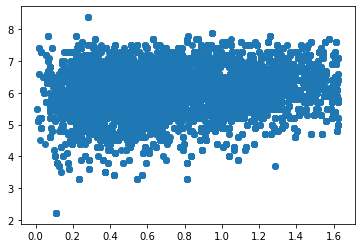

In [119]:
plt.scatter(x=df['popularity'],y=df['vote_average']);

# CONCLUSIONS

## Conclusions from question: Comparison of 10 most successful and 10 least successful movies (successful in terms of revenue)

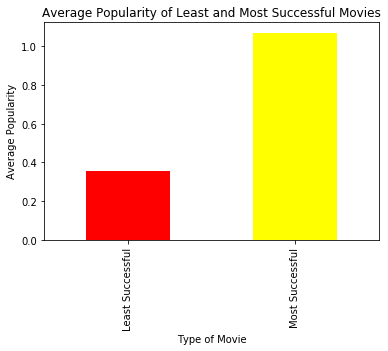

In [120]:
colors=['red','yellow']
df_movies_analysis.groupby('identifier')['popularity'].mean().plot(kind='bar',title="Average Popularity of Least and Most Successful Movies",color=colors);
plt.ylabel("Average Popularity", fontsize=10)
plt.xlabel("Type of Movie",fontsize=10);

<b> The more successful movies have a far higher popularity among the audience</b>

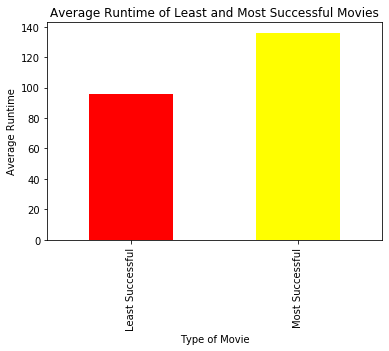

In [121]:
df_movies_analysis.groupby('identifier')['runtime'].mean().plot(kind="bar",title="Average Runtime of Least and Most Successful Movies", color=colors);
plt.ylabel("Average Runtime", fontsize=10)
plt.xlabel("Type of Movie",fontsize=10);

<b> The more successful movies have a higher runtime caompared to the least successful ones</b>

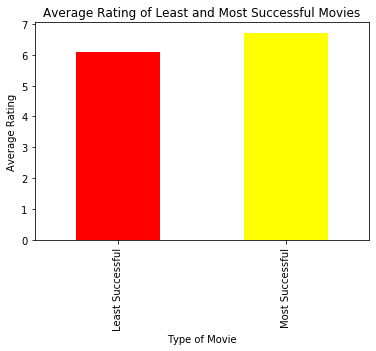

In [122]:
df_movies_analysis.groupby('identifier')['vote_average'].mean().plot(kind="bar",title="Average Rating of Least and Most Successful Movies", color=colors);
plt.ylabel("Average Rating", fontsize=10)
plt.xlabel("Type of Movie",fontsize=10);

<b> The more successful movies have recieved a higher rating from the audience</b>

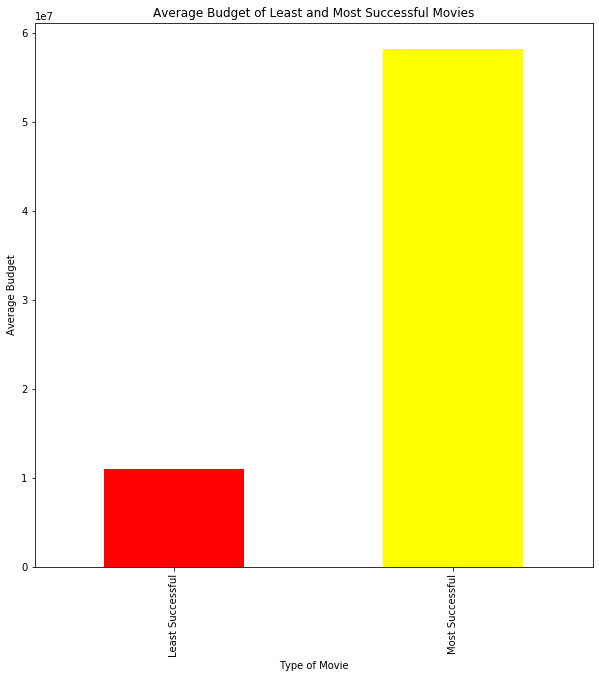

In [123]:
df_movies_analysis.groupby('identifier')['budget_adj'].mean().plot(kind="bar",title="Average Budget of Least and Most Successful Movies", color=colors, figsize=(10,10));
plt.ylabel("Average Budget", fontsize=10)
plt.xlabel("Type of Movie",fontsize=10);

<b> The more successful movies have a higher budget in comparison to the least successful ones</b>

## Conclusions from question: What is the average rating of each genre?

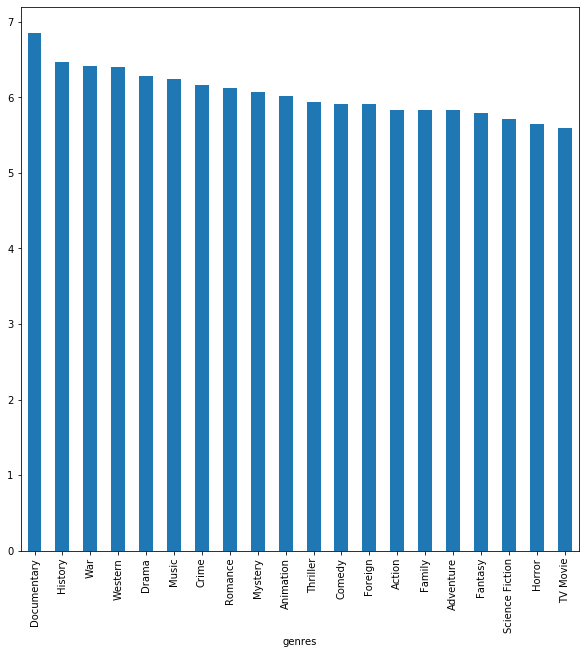

In [124]:
genre_average_rating.plot(kind='bar', figsize=(10,10));

<b>"Documentary" genre films have the highest rating while "TV Movie" genre films have the lowest rating</b>

## Conclusions from question: Which production companies have earned the most revenue?

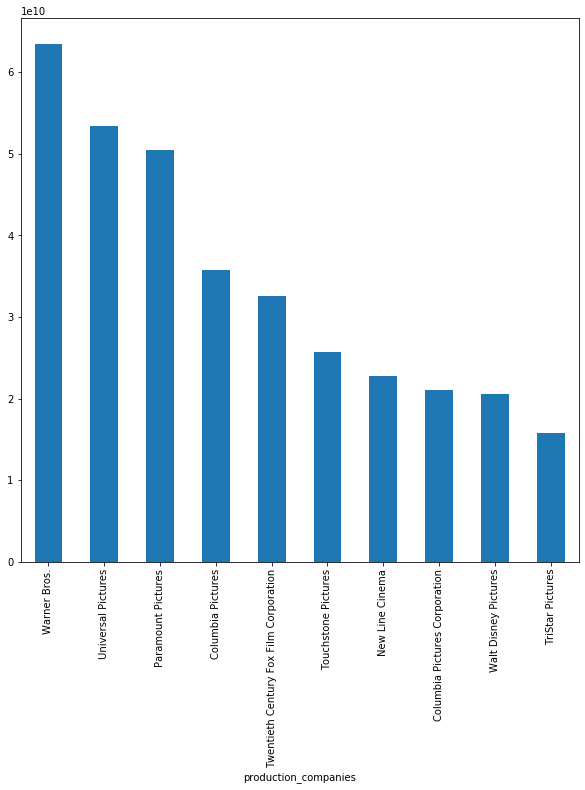

In [125]:
production_companies_revenue.plot(kind='bar', figsize=(10,10));

<b>The top 10 production companies with maximum revenue can be seen above. "Warner Bros" production company has been the most successful company in terms of most money made</b>

## Conclusions from question: Which factors lead to a better average rating?


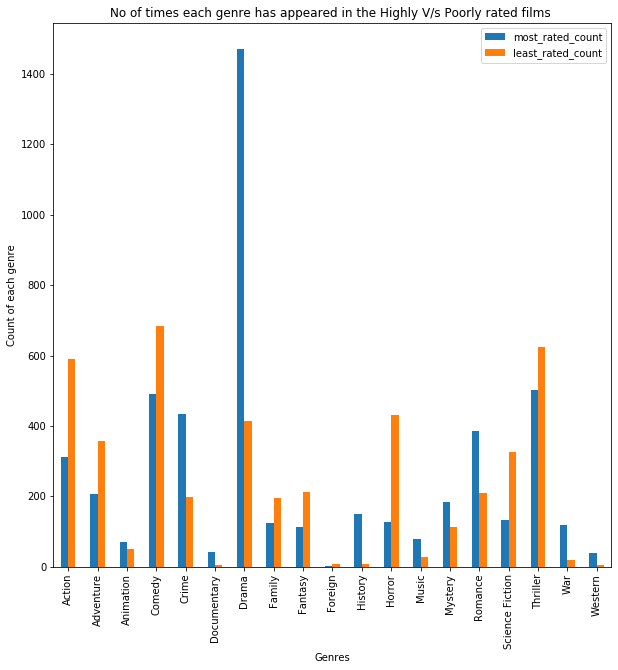

In [126]:
temp_df=pd.merge(genres_with_most_rating,genres_with_least_rating, on='genres')
temp_df.plot(x='genres',y=['most_rated_count','least_rated_count'],figsize=(10,10), kind="bar");
plt.xlabel('Genres')
plt.ylabel('Count of each genre');
plt.title('No of times each genre has appeared in the Highly V/s Poorly rated films ');


<b>Films with genre "Drama" generally lead to a better average rating and films with genre "Action" , "Comedy "Horror" have a lower rating</b>

In [127]:
df_most_rated['runtime'].mean()

116.14535233888778

In [128]:
df_least_rated['runtime'].mean()

99.62044285394767

<b>Highly rated films tend to have a longer run time</b>

In [129]:
df_most_rated[['budget_adj','revenue_adj']].mean()

budget_adj     3.248590e+07
revenue_adj    9.919646e+07
dtype: float64

In [130]:
df_least_rated[['budget_adj','revenue_adj']].mean()

budget_adj     4.501147e+07
revenue_adj    6.141937e+07
dtype: float64

<b>Although the average budgets of both highly and lower rated films is similar, the revenue of higher rated films is more </b>

## Conclusions from question:Do popular films recieve a higher rating?

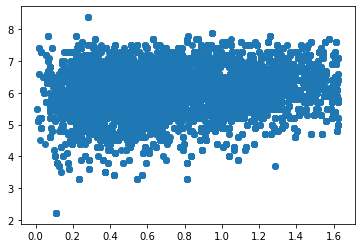

In [131]:
plt.scatter(x=df['popularity'],y=df['vote_average']);

<b> There is no correlation between popularity and vote_average indicating that popular films do not necessarily recieve a higher rating</b>